In [1]:
import mysql.connector
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

In [2]:
db_connection = mysql.connector.connect(
  host="",
  user="",
  passwd="",
  database="mps_data"
)
cursor = db_connection.cursor()

query = '''
SELECT true_label,
        prophet,
        lstm_nn,
        transformer_nn
FROM rq3_test_predictions_daily;
'''
rq3_test_predictions_daily = pd.read_sql(query, db_connection)

query = '''
SELECT true_label,
        prophet,
        lstm_nn,
        transformer_nn
FROM rq3_test_predictions_hourly;
'''
rq3_test_predictions_hourly = pd.read_sql(query, db_connection)

C:\Users\Nikita\AppData\Local\Temp/ipykernel_13980/320838464.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rq3_test_predictions_daily = pd.read_sql(query, db_connection)
C:\Users\Nikita\AppData\Local\Temp/ipykernel_13980/320838464.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rq3_test_predictions_hourly = pd.read_sql(query, db_connection)


In [3]:
#calculate the MSE for each model

mse_lstm_daily = mean_squared_error(rq3_test_predictions_daily['true_label'], rq3_test_predictions_daily['lstm_nn'])
mse_transformer_daily = mean_squared_error(rq3_test_predictions_daily['true_label'], rq3_test_predictions_daily['transformer_nn'])
mse_prophet_daily = mean_squared_error(rq3_test_predictions_daily['true_label'], rq3_test_predictions_daily['prophet'])

mse_lstm_hourly = mean_squared_error(rq3_test_predictions_hourly['true_label'], rq3_test_predictions_hourly['lstm_nn'])
mse_transformer_hourly = mean_squared_error(rq3_test_predictions_hourly['true_label'], rq3_test_predictions_hourly['transformer_nn'])
mse_prophet_hourly = mean_squared_error(rq3_test_predictions_hourly['true_label'], rq3_test_predictions_hourly['prophet'])

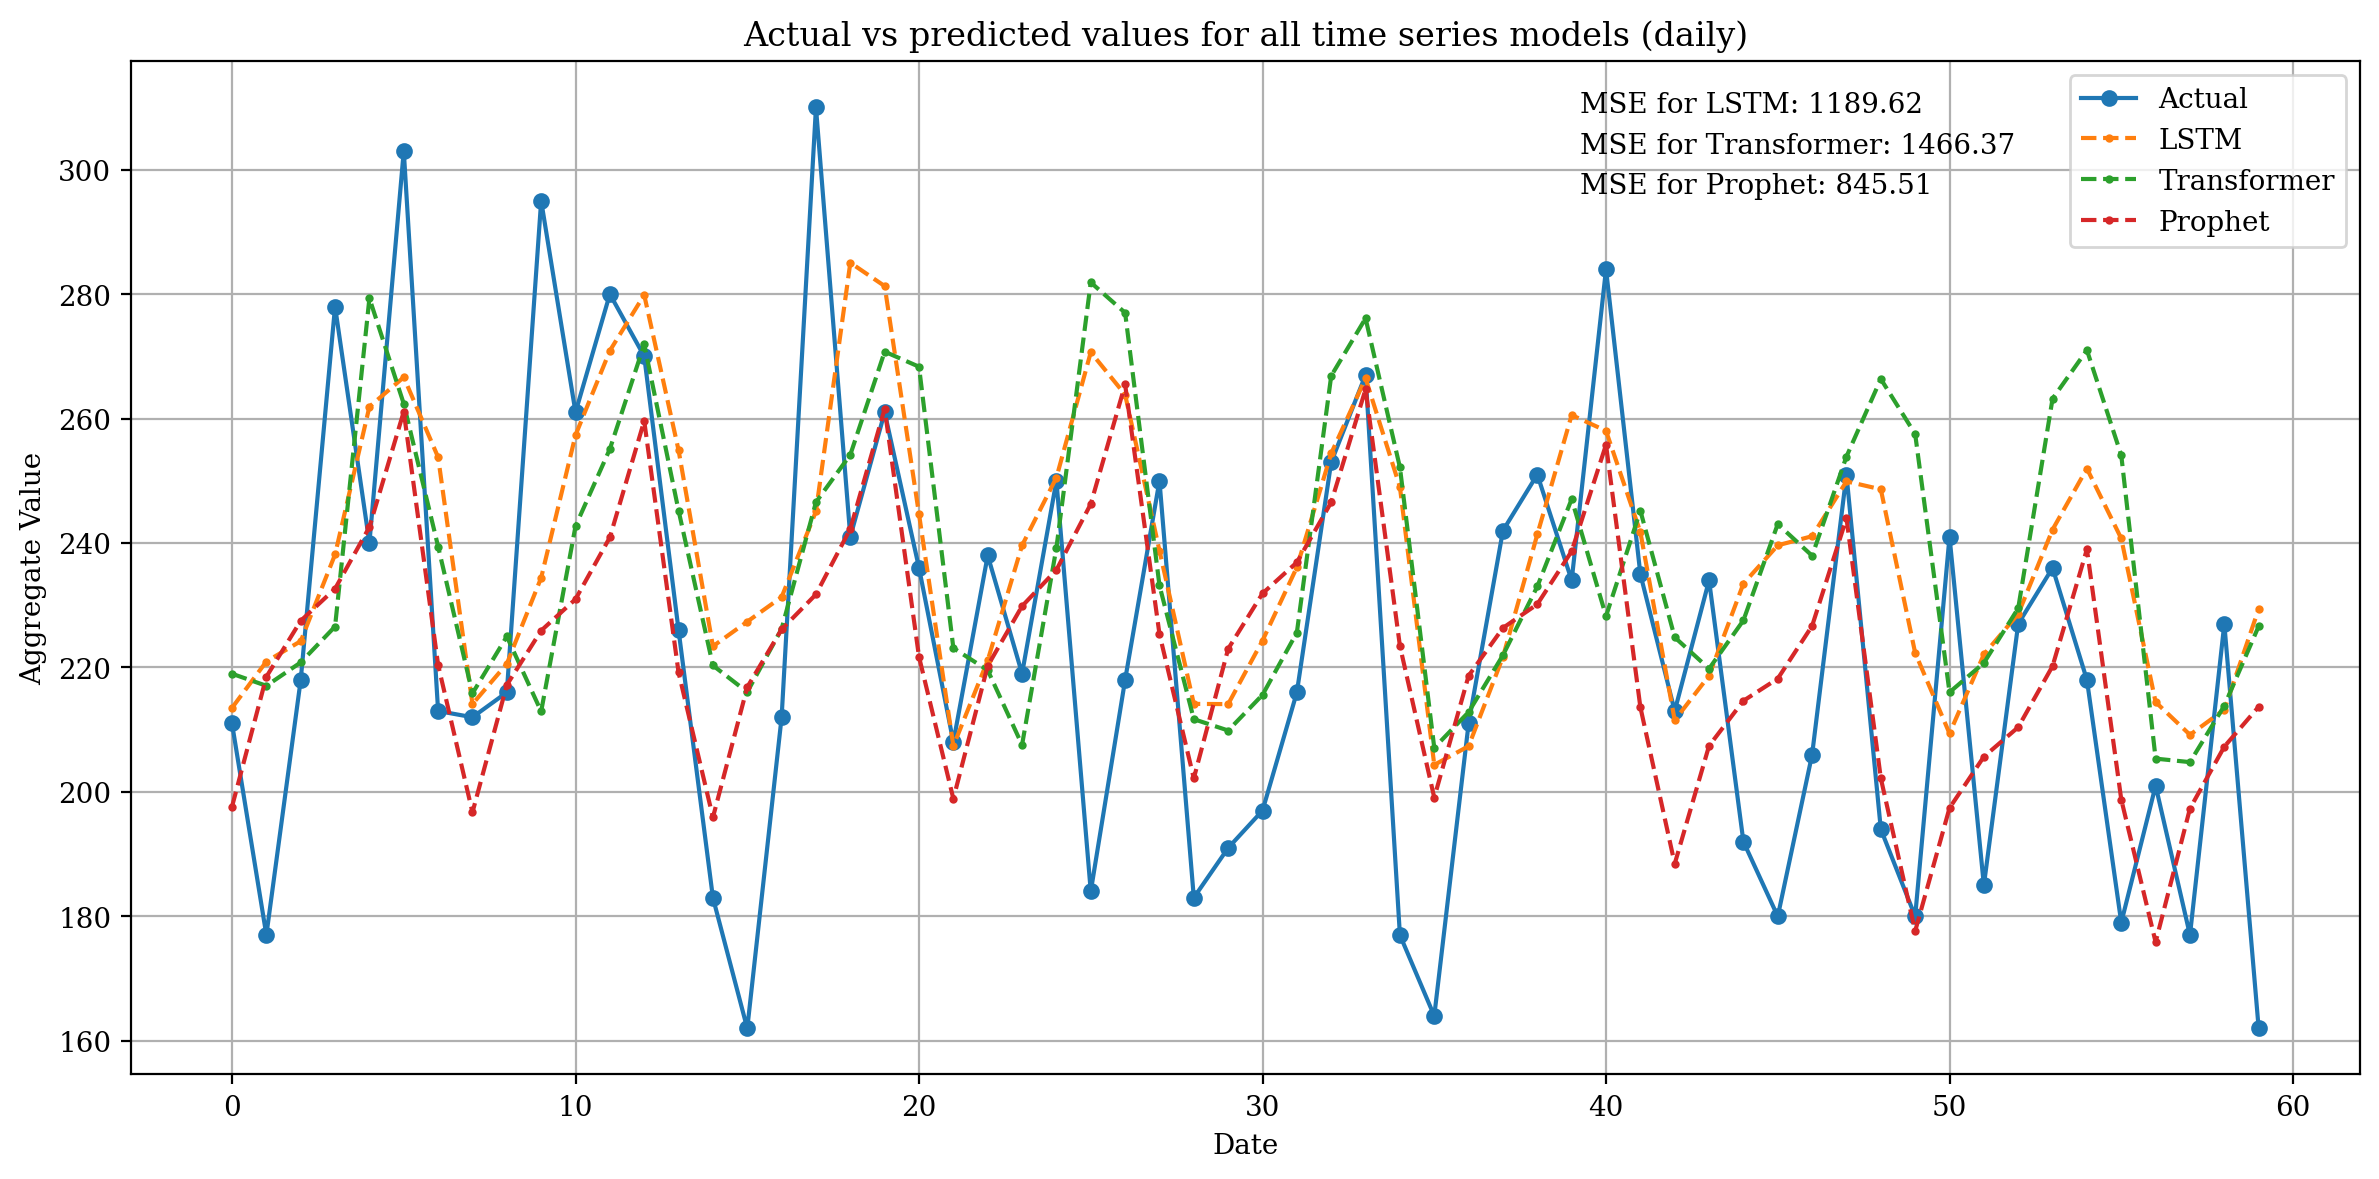

In [4]:
#plot the actual vs predicted values for all models on a single plot

plt.figure(figsize=(12, 6), dpi=200)

plt.plot(rq3_test_predictions_daily['true_label'], label='Actual', linestyle='-', marker='o', markersize=5)
plt.plot(rq3_test_predictions_daily['lstm_nn'], label='LSTM', linestyle='--', marker='o', markersize=2)
plt.plot(rq3_test_predictions_daily['transformer_nn'], label='Transformer', linestyle='--', marker='o', markersize=2)
plt.plot(rq3_test_predictions_daily['prophet'], label='Prophet', linestyle='--', marker='o', markersize=2)

#display the MSE for each model on the plot
plt.text(0.65, 0.95, f'MSE for LSTM: {mse_lstm_daily:.2f}', transform=plt.gca().transAxes)
plt.text(0.65, 0.91, f'MSE for Transformer: {mse_transformer_daily:.2f}', transform=plt.gca().transAxes)
plt.text(0.65, 0.87, f'MSE for Prophet: {mse_prophet_daily:.2f}', transform=plt.gca().transAxes)

plt.xlabel('Date')
plt.ylabel('Aggregate Value')
plt.title('Actual vs predicted values for all time series models (daily)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted_values_all_daily.png', dpi=200)
plt.show()

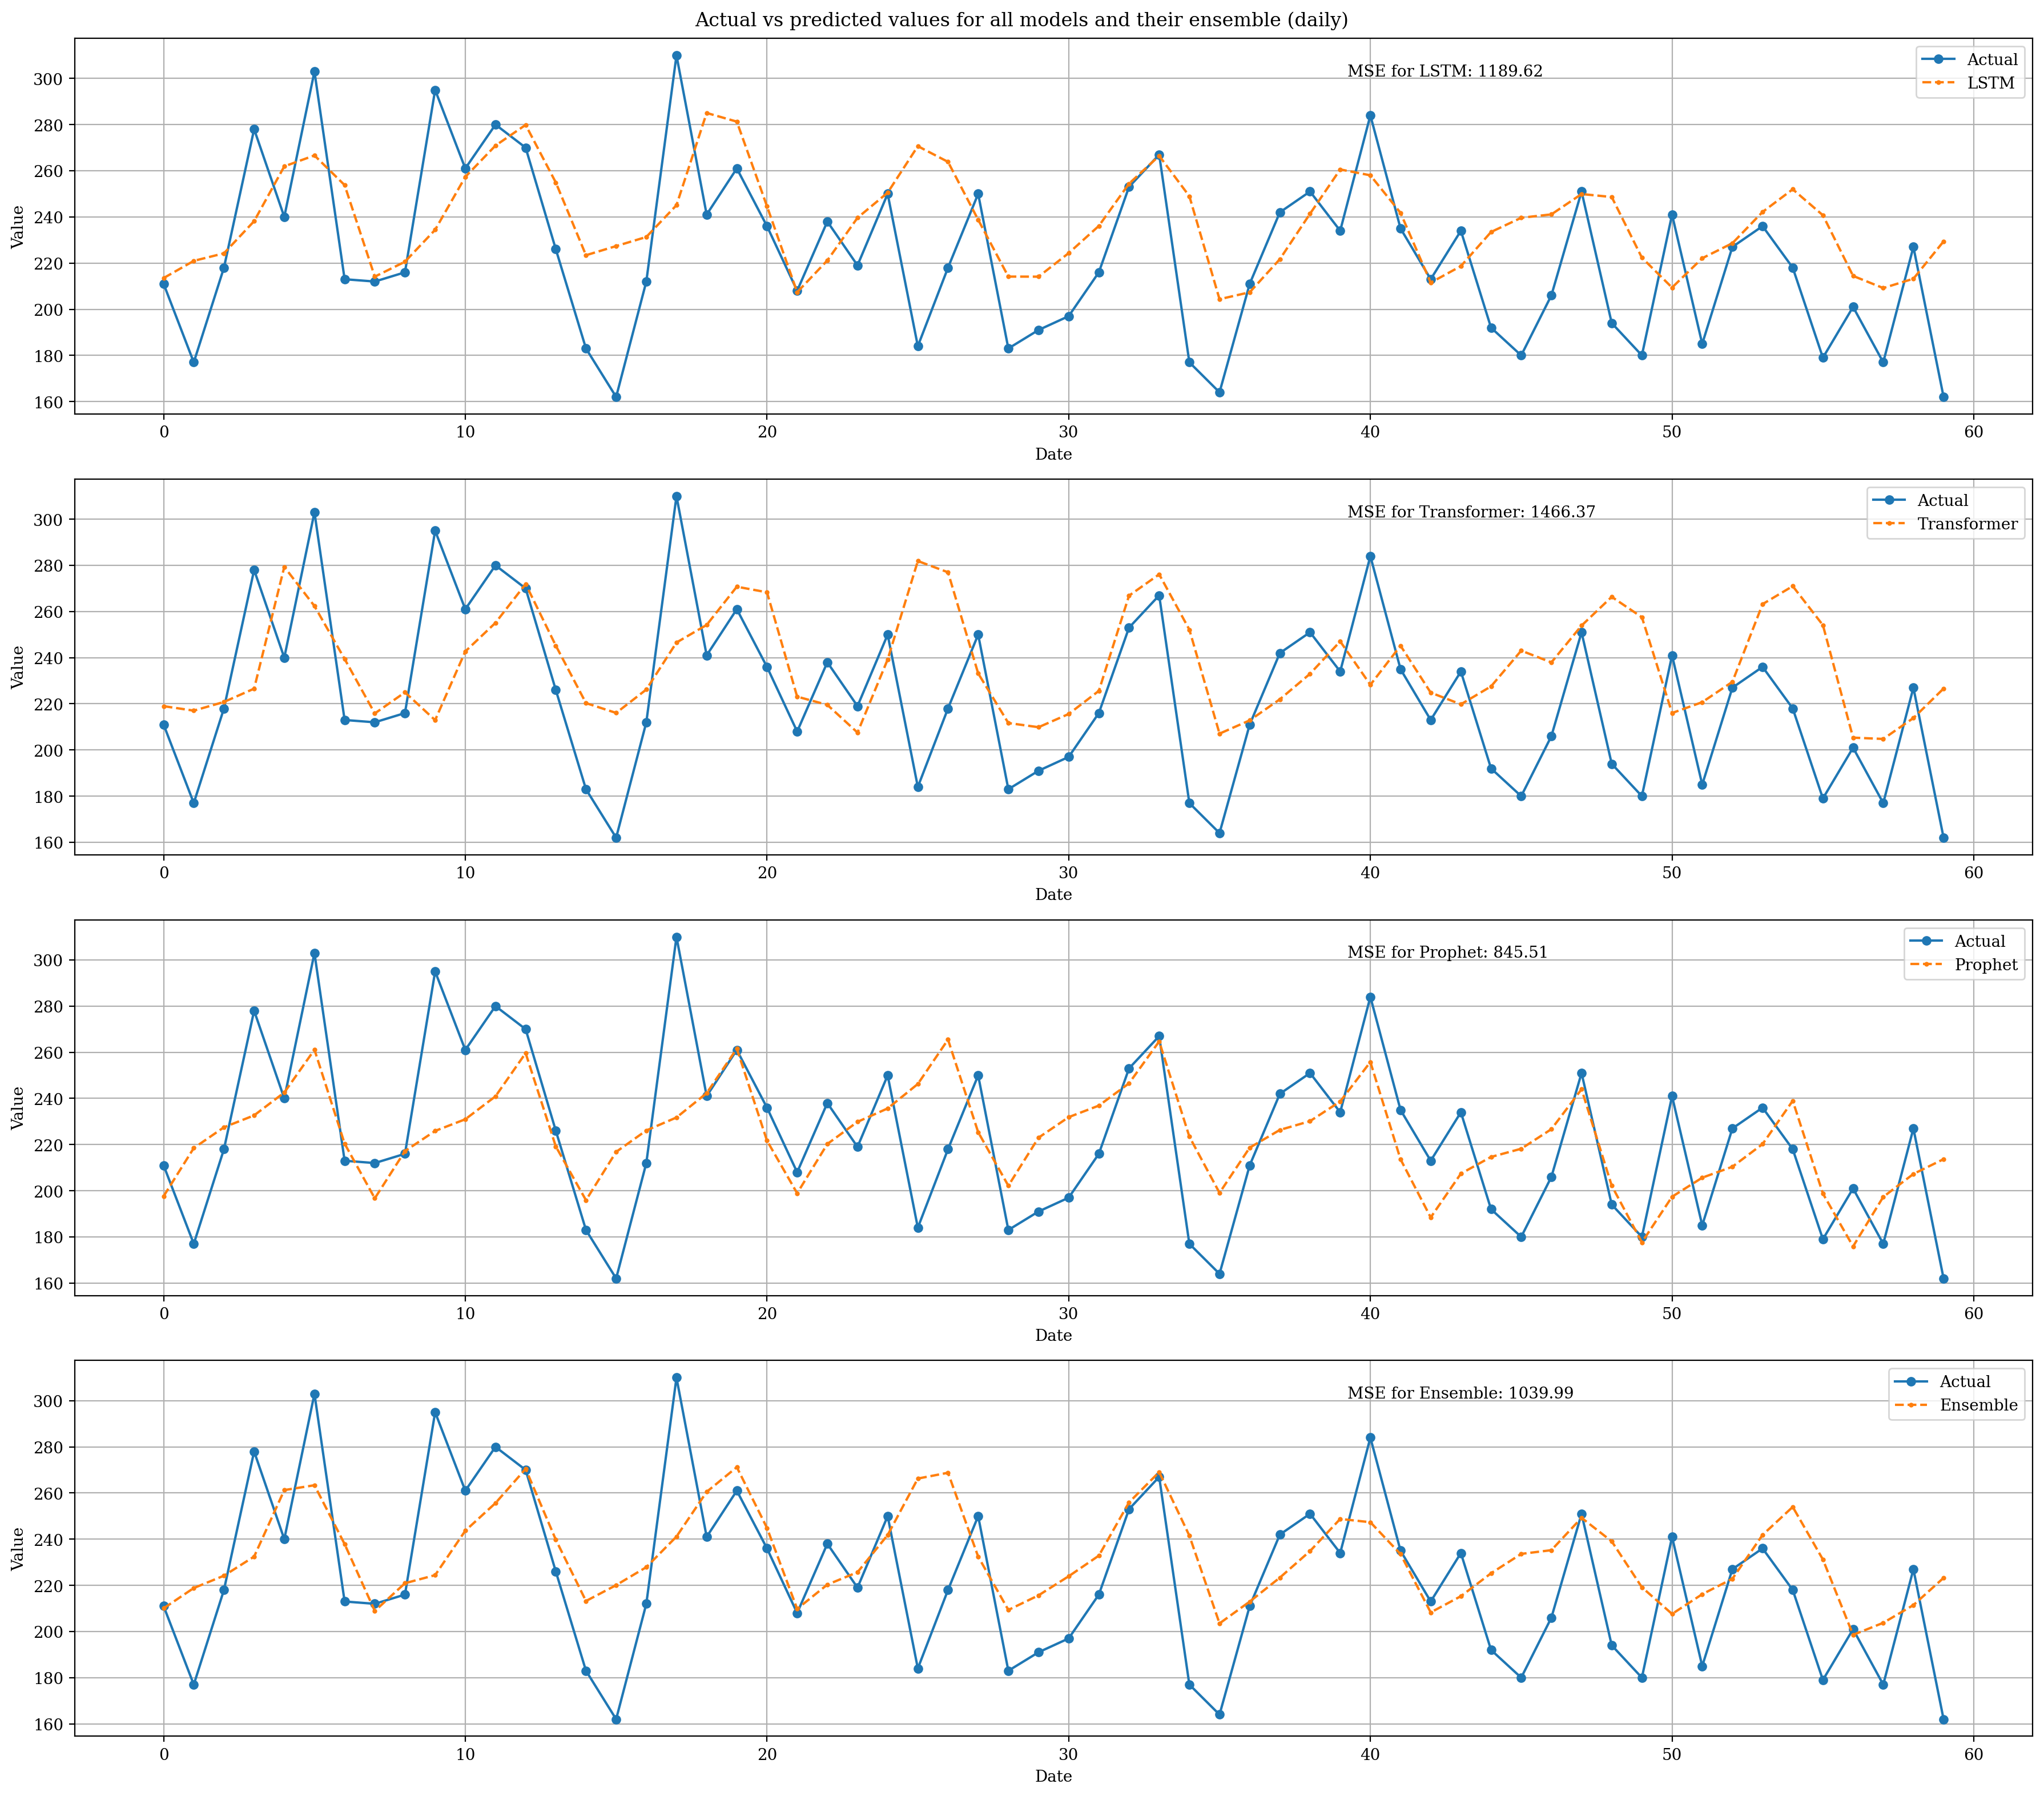

In [5]:
#create a plot for the daily data
fig = plt.figure(figsize=(18, 16), dpi=200)

#calculate mean prediction for each model (ensemble prediction)
rq3_test_predictions_daily['ensemble'] = rq3_test_predictions_daily[['lstm_nn', 'transformer_nn', 'prophet']].mean(axis=1)

#LSTM model
ax1 = plt.subplot(4, 1, 1)
ax1.plot(rq3_test_predictions_daily['true_label'], label='Actual', linestyle='-', marker='o', markersize=5)
ax1.plot(rq3_test_predictions_daily['lstm_nn'], label='LSTM', linestyle='--', marker='o', markersize=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.text(0.65, 0.90, f'MSE for LSTM: {mse_lstm_daily:.2f}', transform=ax1.transAxes)
ax1.legend()
ax1.grid(True)

#transformer encoded model
ax2 = plt.subplot(4, 1, 2)
ax2.plot(rq3_test_predictions_daily['true_label'], label='Actual', linestyle='-', marker='o', markersize=5)
ax2.plot(rq3_test_predictions_daily['transformer_nn'], label='Transformer', linestyle='--', marker='o', markersize=2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.text(0.65, 0.90, f'MSE for Transformer: {mse_transformer_daily:.2f}', transform=ax2.transAxes)
ax2.legend()
ax2.grid(True)

#prophet model
ax3 = plt.subplot(4, 1, 3)
ax3.plot(rq3_test_predictions_daily['true_label'], label='Actual', linestyle='-', marker='o', markersize=5)
ax3.plot(rq3_test_predictions_daily['prophet'], label='Prophet', linestyle='--', marker='o', markersize=2)
ax3.set_xlabel('Date')
ax3.set_ylabel('Value')
ax3.text(0.65, 0.90, f'MSE for Prophet: {mse_prophet_daily:.2f}', transform=ax3.transAxes)
ax3.legend()
ax3.grid(True)

#ensemble model
ax4 = plt.subplot(4, 1, 4)
ax4.plot(rq3_test_predictions_daily['true_label'], label='Actual', linestyle='-', marker='o', markersize=5)
ax4.plot(rq3_test_predictions_daily['ensemble'], label='Ensemble', linestyle='--', marker='o', markersize=2)
ax4.set_xlabel('Date')
ax4.set_ylabel('Value')
mse_ensemble_daily = ((rq3_test_predictions_daily['ensemble'] - rq3_test_predictions_daily['true_label'])**2).mean()
ax4.text(0.65, 0.90, f'MSE for Ensemble: {mse_ensemble_daily:.2f}', transform=ax4.transAxes)
ax4.legend()
ax4.grid(True)

#title for the whole plot
plt.suptitle('Actual vs predicted values for all models and their ensemble (daily)')
plt.tight_layout()
#ensure space between the title and first plot
fig.subplots_adjust(top=0.965)
plt.savefig('rq3_daily_all_models.png', dpi=200)
plt.show()

In [9]:
import statsmodels.api as sm
#models to be tested
models = ['prophet', 'lstm_nn', 'transformer_nn', 'ensemble']
for model in models:
    #compute the residuals
    rq3_test_predictions_daily[f'{model}_residuals'] = rq3_test_predictions_daily['true_label'] - rq3_test_predictions_daily[model]
    print(f'{model.capitalize()} white noise test (10 lags):')
    print(sm.stats.acorr_ljungbox(rq3_test_predictions_daily[f'{model}_residuals'], lags=[10]))
    print(f'{model.capitalize()} white noise test (20 lags):')
    print(sm.stats.acorr_ljungbox(rq3_test_predictions_daily[f'{model}_residuals'], lags=[20]))
    print(f'{model.capitalize()} white noise test (30 lags):')
    print(sm.stats.acorr_ljungbox(rq3_test_predictions_daily[f'{model}_residuals'], lags=[30]))
    print('-----------------------')

Prophet white noise test (10 lags):
     lb_stat  lb_pvalue
10  4.495079   0.922263
Prophet white noise test (20 lags):
      lb_stat  lb_pvalue
20  11.665357   0.927113
Prophet white noise test (30 lags):
      lb_stat  lb_pvalue
30  21.111334   0.884374
-----------------------
Lstm_nn white noise test (10 lags):
     lb_stat  lb_pvalue
10  4.623629   0.914862
Lstm_nn white noise test (20 lags):
      lb_stat  lb_pvalue
20  11.827245   0.921894
Lstm_nn white noise test (30 lags):
      lb_stat  lb_pvalue
30  19.130757   0.937228
-----------------------
Transformer_nn white noise test (10 lags):
     lb_stat  lb_pvalue
10  4.765609   0.906275
Transformer_nn white noise test (20 lags):
     lb_stat  lb_pvalue
20  14.54752   0.801687
Transformer_nn white noise test (30 lags):
      lb_stat  lb_pvalue
30  21.442358   0.873548
-----------------------
Ensemble white noise test (10 lags):
     lb_stat  lb_pvalue
10  4.400385   0.927483
Ensemble white noise test (20 lags):
      lb_stat  lb_p

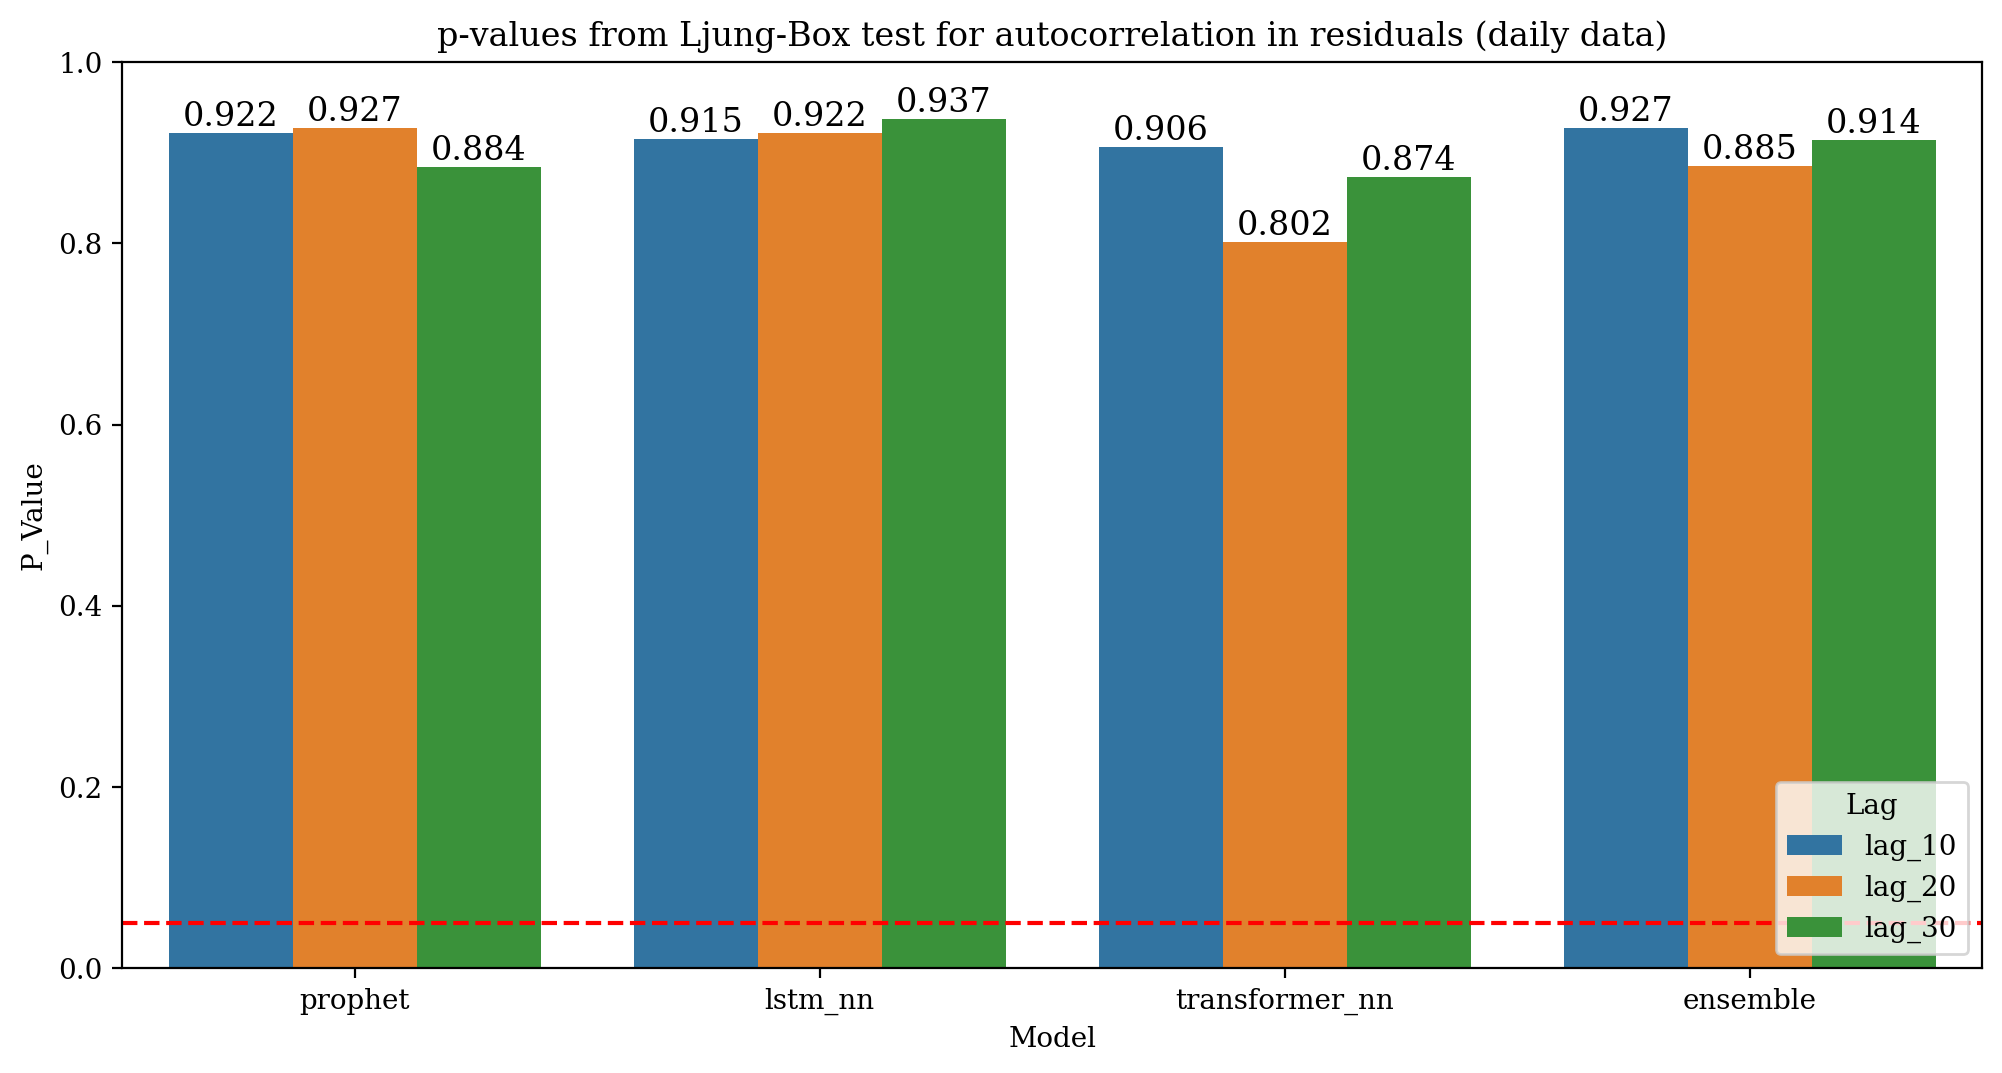

In [13]:
import seaborn as sns

#create a dictionary to store the results
p_values_dict = {}
#list the lag range to be tested
lags_list = [10, 20, 30]

for model in models:
    rq3_test_predictions_daily[f'{model}_residuals'] = rq3_test_predictions_daily['true_label'] - rq3_test_predictions_daily[model]
    for lag in lags_list:
        p_values_dict[(model, f"lag_{lag}")] = sm.stats.acorr_ljungbox(rq3_test_predictions_daily[f'{model}_residuals'], lags=[lag], return_df=True).iloc[0,1]

#convert dictionary to dataframe (to simplify plotting)
df_p_values = pd.DataFrame(list(p_values_dict.items()), columns=['Model_Lag', 'P_Value'])
df_p_values['Model'] = df_p_values['Model_Lag'].apply(lambda x: x[0])
df_p_values['Lag'] = df_p_values['Model_Lag'].apply(lambda x: x[1])

#plot the p-values
plt.figure(figsize=(12, 6), dpi=200)
ax = sns.barplot(x='Model', y='P_Value', hue='Lag', data=df_p_values)
plt.axhline(y=0.05, color='red', linestyle='--')  #threshold for 95% significance
plt.title("p-values from Ljung-Box test for autocorrelation in residuals (daily data)")
plt.legend(title='Lag', loc='lower right')

#add the p-value labels above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.3f}'.format(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

#enforce the y-axis limits
plt.ylim(0, 1)
plt.savefig('ljung_box_daily.png')
plt.show()

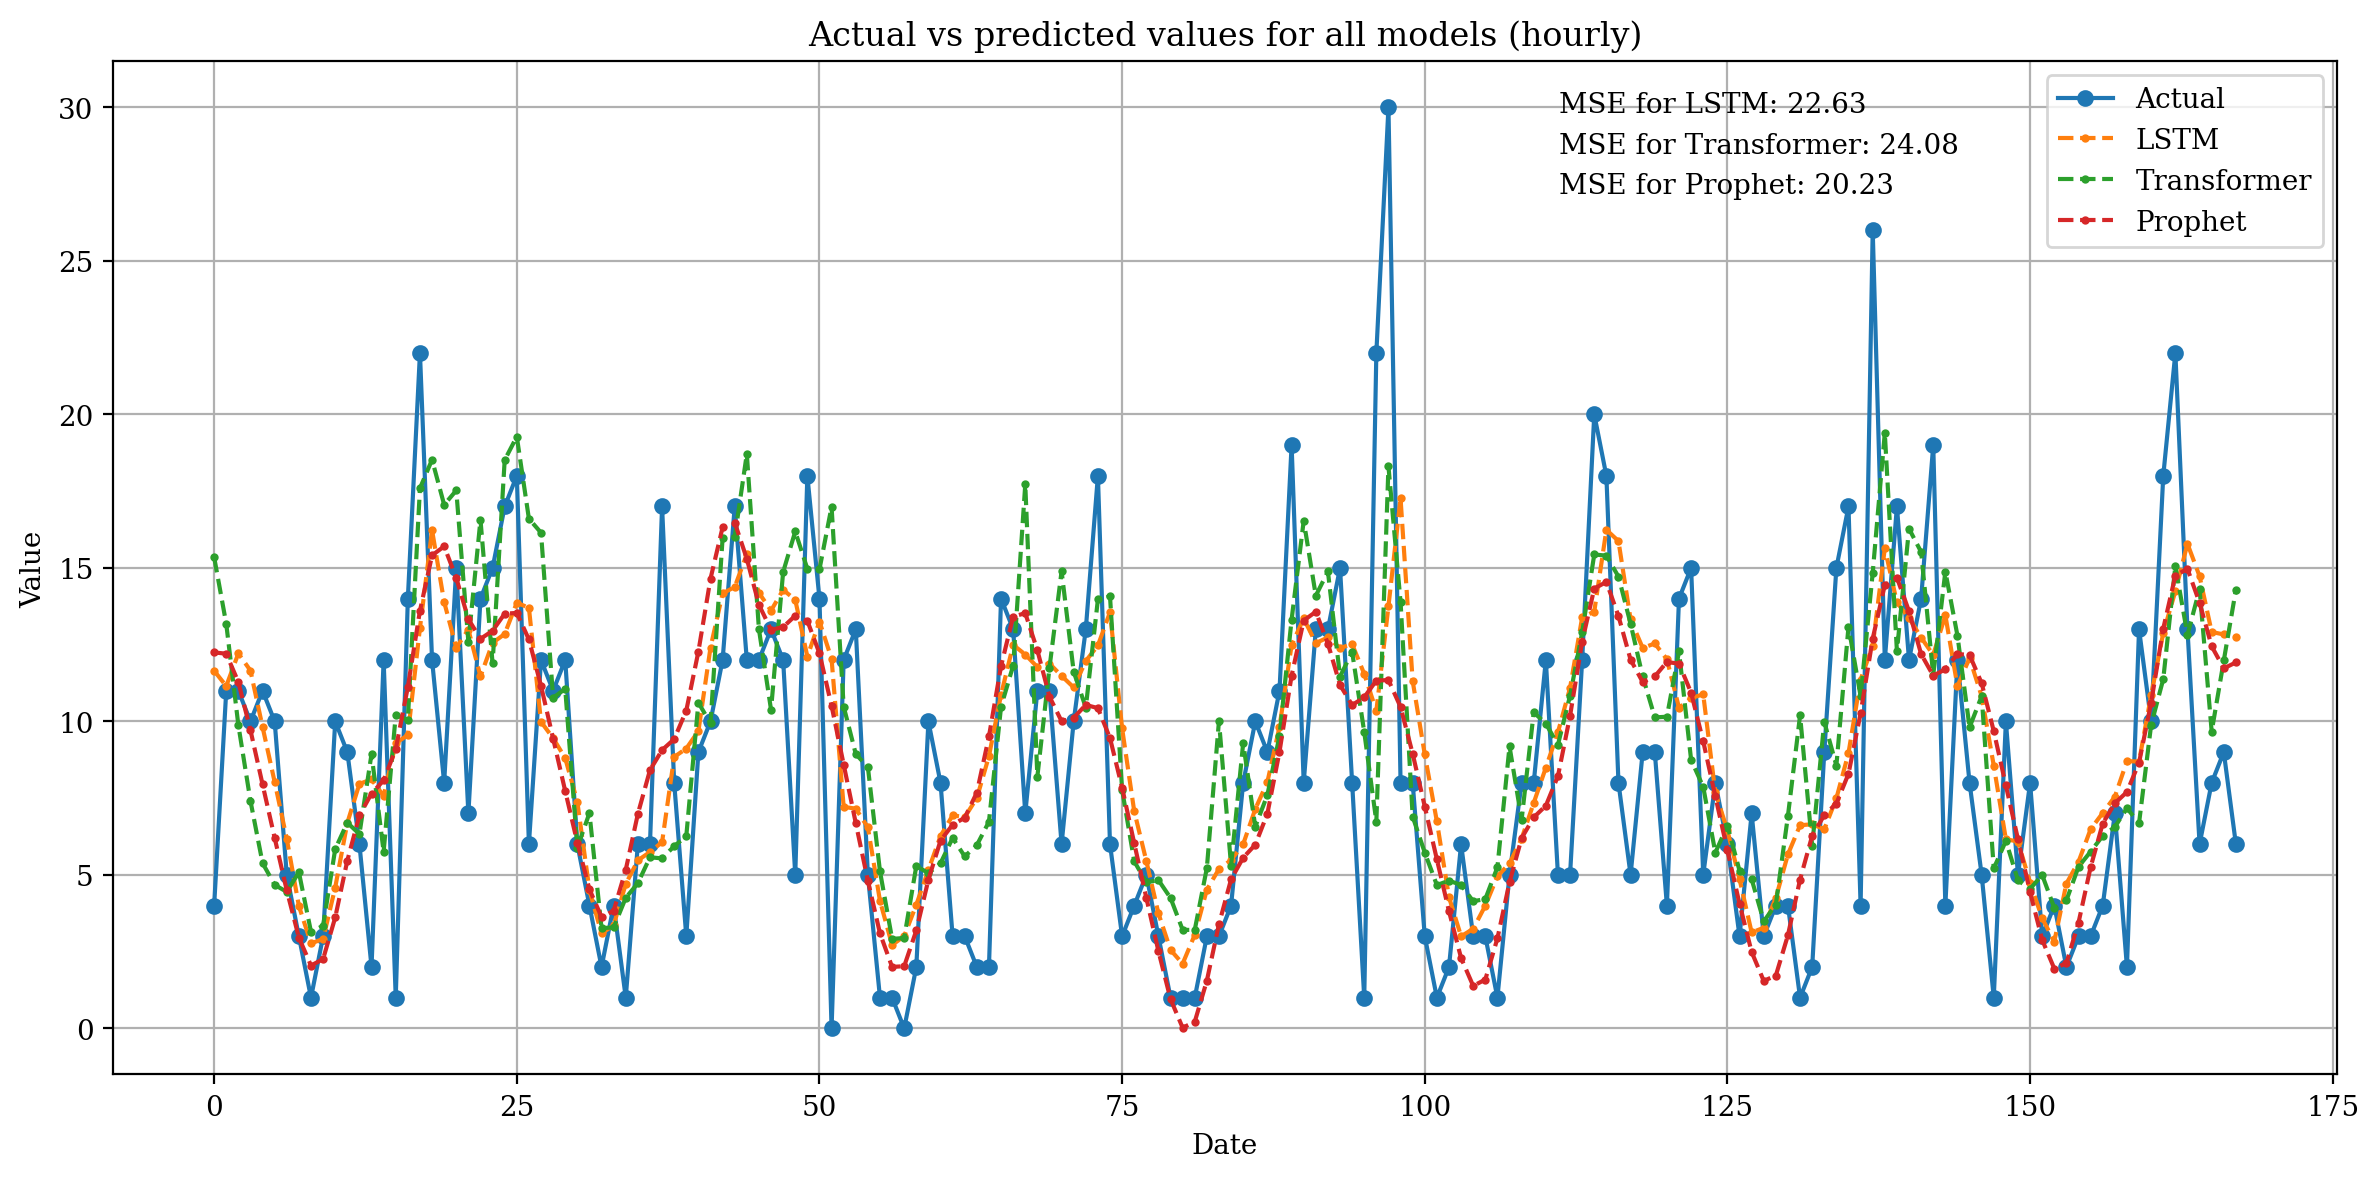

In [6]:
plt.figure(figsize=(12, 6), dpi=200)

plt.plot(rq3_test_predictions_hourly['true_label'], label='Actual', linestyle='-', marker='o', markersize=5)
plt.plot(rq3_test_predictions_hourly['lstm_nn'], label='LSTM', linestyle='--', marker='o', markersize=2)
plt.plot(rq3_test_predictions_hourly['transformer_nn'], label='Transformer', linestyle='--', marker='o', markersize=2)
plt.plot(rq3_test_predictions_hourly['prophet'], label='Prophet', linestyle='--', marker='o', markersize=2)

plt.text(0.65, 0.95, f'MSE for LSTM: {mse_lstm_hourly:.2f}', transform=plt.gca().transAxes)
plt.text(0.65, 0.91, f'MSE for Transformer: {mse_transformer_hourly:.2f}', transform=plt.gca().transAxes)
plt.text(0.65, 0.87, f'MSE for Prophet: {mse_prophet_hourly:.2f}', transform=plt.gca().transAxes)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs predicted values for all models (hourly)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted_values_all_hourly.png', dpi=200)
plt.show()

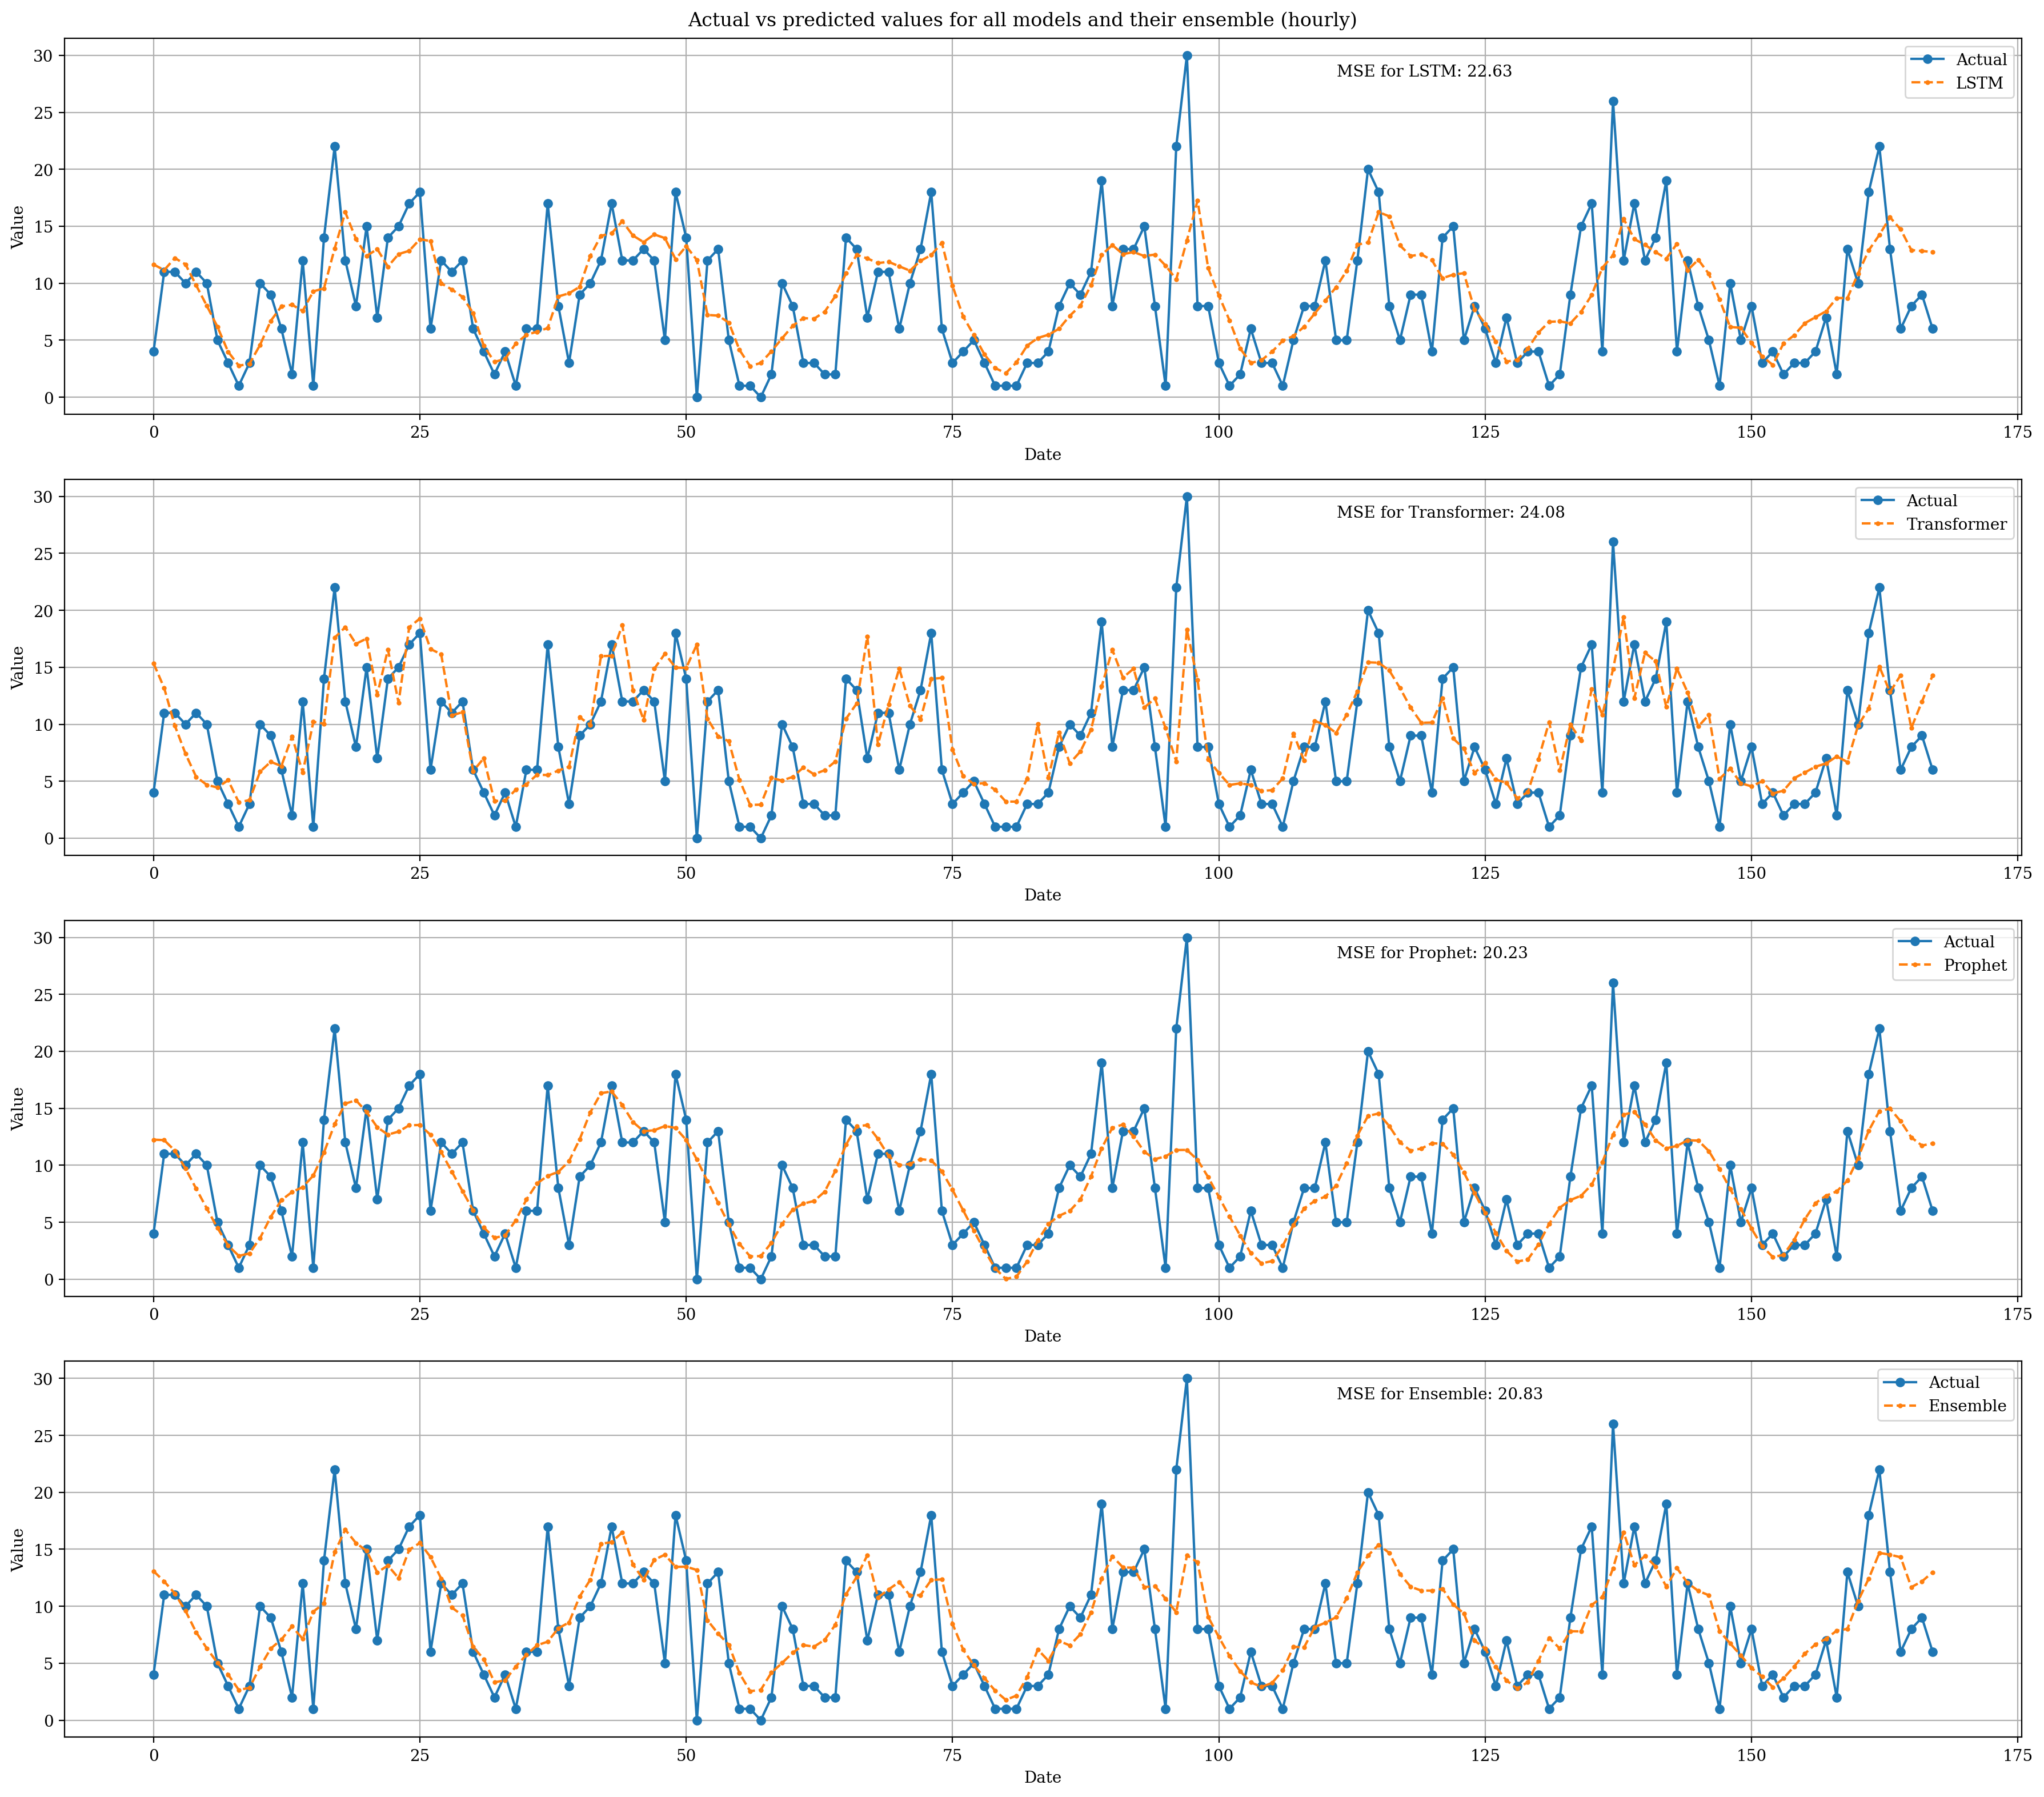

In [7]:
#create a plot for the daily data
fig = plt.figure(figsize=(18, 16), dpi=200)

#calculate mean prediction for each model (ensemble prediction)
rq3_test_predictions_hourly['ensemble'] = rq3_test_predictions_hourly[['lstm_nn', 'transformer_nn', 'prophet']].mean(axis=1)

#LSTM model
ax1 = plt.subplot(4, 1, 1)
ax1.plot(rq3_test_predictions_hourly['true_label'], label='Actual', linestyle='-', marker='o', markersize=5)
ax1.plot(rq3_test_predictions_hourly['lstm_nn'], label='LSTM', linestyle='--', marker='o', markersize=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.text(0.65, 0.90, f'MSE for LSTM: {mse_lstm_hourly:.2f}', transform=ax1.transAxes)
ax1.legend()
ax1.grid(True)

#transformer encoded model
ax2 = plt.subplot(4, 1, 2)
ax2.plot(rq3_test_predictions_hourly['true_label'], label='Actual', linestyle='-', marker='o', markersize=5)
ax2.plot(rq3_test_predictions_hourly['transformer_nn'], label='Transformer', linestyle='--', marker='o', markersize=2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.text(0.65, 0.90, f'MSE for Transformer: {mse_transformer_hourly:.2f}', transform=ax2.transAxes)
ax2.legend()
ax2.grid(True)

#prophet model
ax3 = plt.subplot(4, 1, 3)
ax3.plot(rq3_test_predictions_hourly['true_label'], label='Actual', linestyle='-', marker='o', markersize=5)
ax3.plot(rq3_test_predictions_hourly['prophet'], label='Prophet', linestyle='--', marker='o', markersize=2)
ax3.set_xlabel('Date')
ax3.set_ylabel('Value')
ax3.text(0.65, 0.90, f'MSE for Prophet: {mse_prophet_hourly:.2f}', transform=ax3.transAxes)
ax3.legend()
ax3.grid(True)

#ensemble model
ax4 = plt.subplot(4, 1, 4)
ax4.plot(rq3_test_predictions_hourly['true_label'], label='Actual', linestyle='-', marker='o', markersize=5)
ax4.plot(rq3_test_predictions_hourly['ensemble'], label='Ensemble', linestyle='--', marker='o', markersize=2)
ax4.set_xlabel('Date')
ax4.set_ylabel('Value')
mse_ensemble_hourly = ((rq3_test_predictions_hourly['ensemble'] - rq3_test_predictions_hourly['true_label'])**2).mean()
ax4.text(0.65, 0.90, f'MSE for Ensemble: {mse_ensemble_hourly:.2f}', transform=ax4.transAxes)
ax4.legend()
ax4.grid(True)

#title for the whole plot
plt.suptitle('Actual vs predicted values for all models and their ensemble (hourly)')
plt.tight_layout()
#ensure space between the title and first plot
fig.subplots_adjust(top=0.965)
plt.savefig('rq3_hourly_all_models.png', dpi=200)
plt.show()

In [15]:
for model in models:
    rq3_test_predictions_hourly[f'{model}_residuals'] = rq3_test_predictions_hourly['true_label'] - rq3_test_predictions_hourly[model]
    print(f'{model.capitalize()} white noise test (10 lags):')
    print(sm.stats.acorr_ljungbox(rq3_test_predictions_hourly[f'{model}_residuals'], lags=[10]))
    print(f'{model.capitalize()} white noise test (20 lags):')
    print(sm.stats.acorr_ljungbox(rq3_test_predictions_hourly[f'{model}_residuals'], lags=[20]))
    print(f'{model.capitalize()} white noise test (30 lags):')
    print(sm.stats.acorr_ljungbox(rq3_test_predictions_hourly[f'{model}_residuals'], lags=[30]))
    print('-----------------------')

Prophet white noise test (10 lags):
      lb_stat  lb_pvalue
10  12.672448   0.242567
Prophet white noise test (20 lags):
      lb_stat  lb_pvalue
20  20.922442    0.40171
Prophet white noise test (30 lags):
      lb_stat  lb_pvalue
30  26.013539    0.67444
-----------------------
Lstm_nn white noise test (10 lags):
      lb_stat  lb_pvalue
10  14.394793   0.155733
Lstm_nn white noise test (20 lags):
      lb_stat  lb_pvalue
20  24.533208   0.219876
Lstm_nn white noise test (30 lags):
      lb_stat  lb_pvalue
30  29.821794   0.474807
-----------------------
Transformer_nn white noise test (10 lags):
      lb_stat  lb_pvalue
10  10.780463   0.374876
Transformer_nn white noise test (20 lags):
      lb_stat  lb_pvalue
20  21.623717   0.361273
Transformer_nn white noise test (30 lags):
      lb_stat  lb_pvalue
30  29.149249   0.509767
-----------------------
Ensemble white noise test (10 lags):
      lb_stat  lb_pvalue
10  14.343536   0.157891
Ensemble white noise test (20 lags):
      lb_

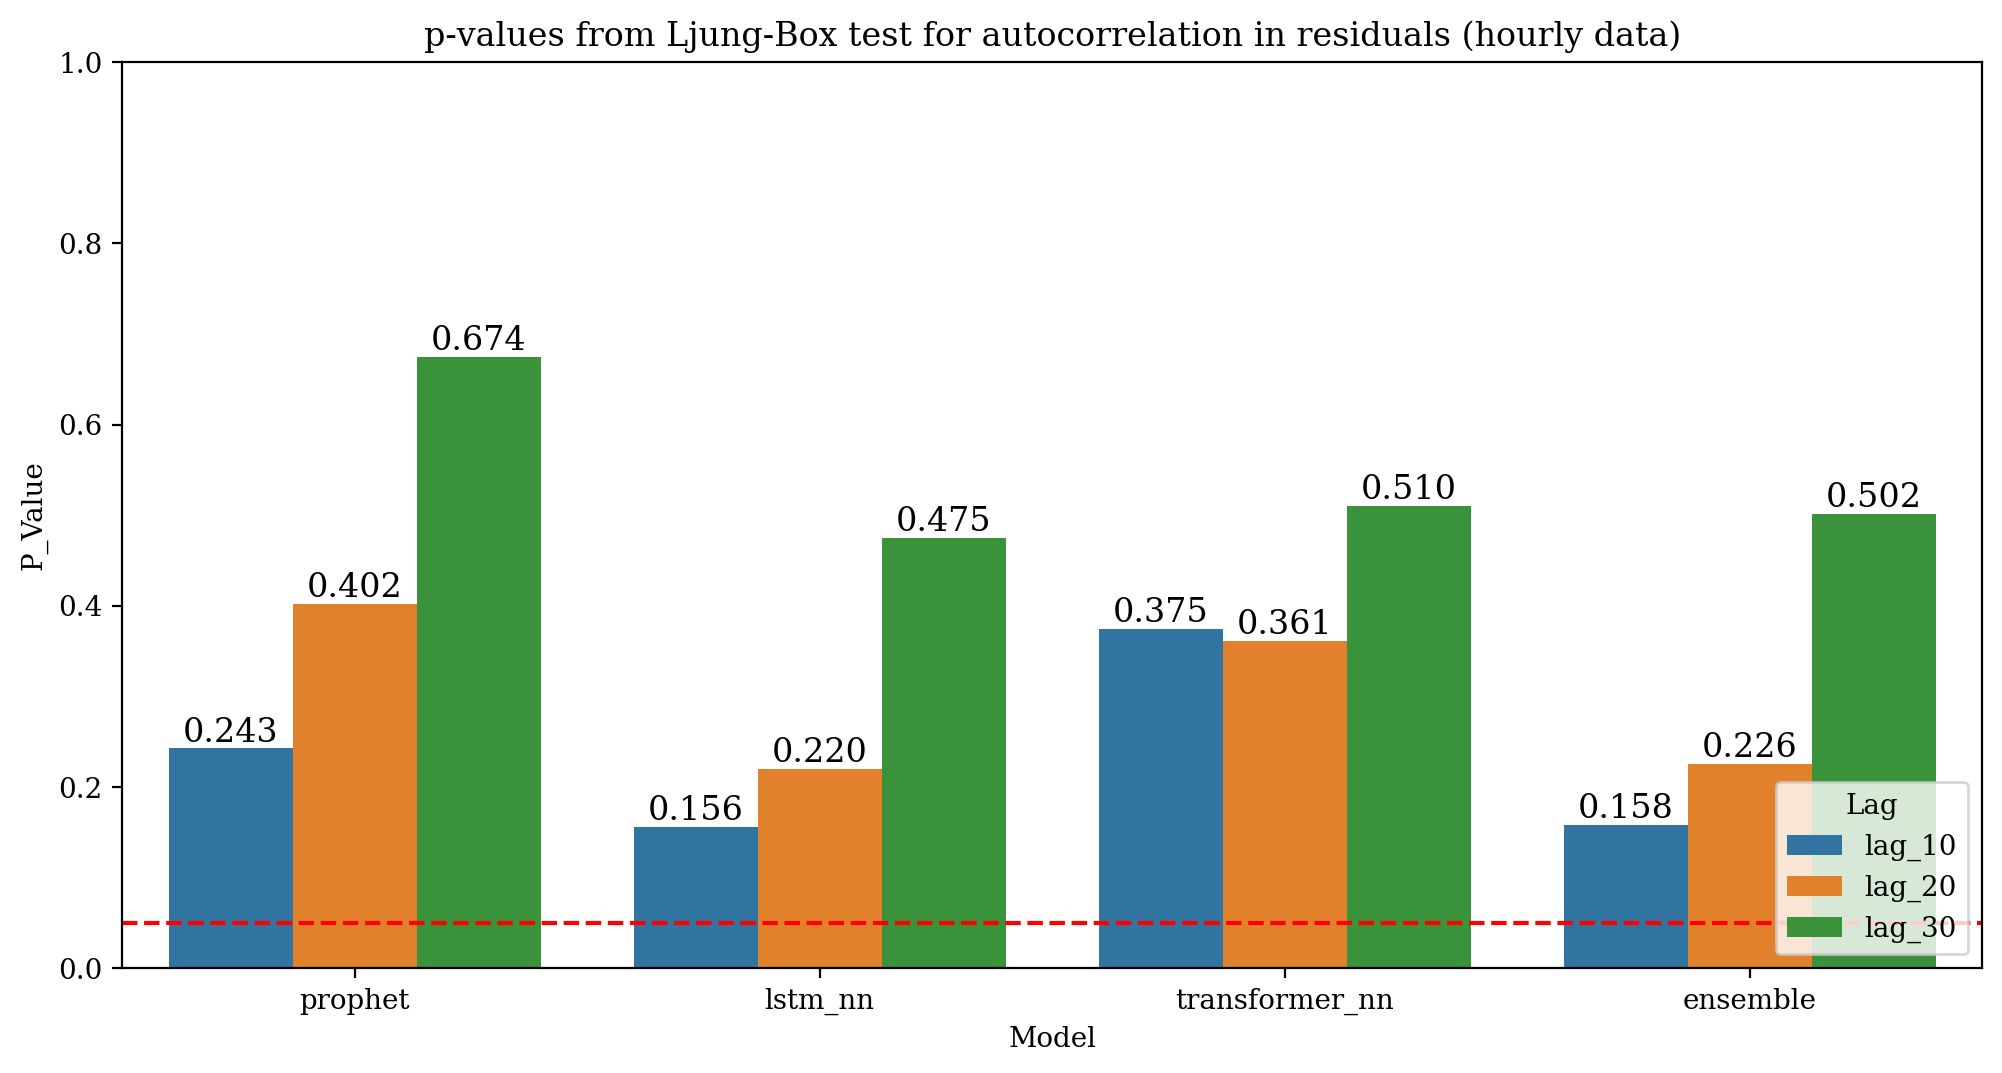

In [18]:
p_values_dict = {}

for model in models:
    rq3_test_predictions_hourly[f'{model}_residuals'] = rq3_test_predictions_hourly['true_label'] - rq3_test_predictions_hourly[model]
    for lag in lags_list:
        p_values_dict[(model, f"lag_{lag}")] = sm.stats.acorr_ljungbox(rq3_test_predictions_hourly[f'{model}_residuals'], lags=[lag], return_df=True).iloc[0,1]

df_p_values = pd.DataFrame(list(p_values_dict.items()), columns=['Model_Lag', 'P_Value'])
df_p_values['Model'] = df_p_values['Model_Lag'].apply(lambda x: x[0])
df_p_values['Lag'] = df_p_values['Model_Lag'].apply(lambda x: x[1])

plt.figure(figsize=(12, 6), dpi=200)
ax = sns.barplot(x='Model', y='P_Value', hue='Lag', data=df_p_values)
plt.axhline(y=0.05, color='red', linestyle='--')  #threshold for 95% significance
plt.title("p-values from Ljung-Box test for autocorrelation in residuals (hourly data)")
plt.legend(title='Lag', loc='lower right')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.3f}'.format(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

plt.ylim(0, 1)
plt.savefig('ljung_box_hourly.png')
plt.show()